In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [41]:
df = pd.read_csv('data/data_GWP_atoms.csv')
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,GWP
0,0,-0.6854,0.469773,16.0871,11.416344,0,0,12,4,8,...,6.871320,1.717830,2.310660,2.310660,0.00000,10,1,0.282,10,4.440
1,0,0.9449,0.892836,10.8232,7.301172,0,0,8,4,4,...,6.732051,1.683013,4.488034,0.000000,0.00000,9,0,1.542,12,6.400
2,0,-0.9734,0.947508,18.9987,14.509930,0,0,15,5,10,...,8.849874,1.769975,2.362437,2.362437,0.00000,20,2,0.851,14,2.900
3,0,-0.6961,0.484555,20.6715,14.509930,0,0,15,5,10,...,8.696802,1.739360,2.313053,2.313053,0.00000,18,2,0.742,16,4.290
4,0,0.1242,0.015426,21.5446,14.509930,0,0,15,5,10,...,8.696802,1.739360,2.329115,2.329115,0.00000,18,2,0.579,16,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0.0211,0.000445,17.4128,10.884758,0,0,11,5,6,...,8.696802,1.739360,4.899812,4.899812,0.00000,18,2,0.241,16,2.870
183,0,-1.1870,1.408969,16.2111,10.089551,0,0,11,4,7,...,6.871320,1.717830,4.621320,2.310660,2.31066,10,1,-1.275,10,9.530
184,0,-0.5281,0.278890,23.7679,14.943137,0,0,15,6,9,...,11.812500,1.968750,5.875000,2.937500,2.93750,27,3,-0.576,24,15.500
185,0,5.1662,26.689622,49.8066,47.827032,0,0,37,13,24,...,23.625608,1.817354,15.358678,5.652951,0.00000,248,12,4.392,64,0.828


In [42]:
# Is there any NA in this dataset?
np.sum(df.isna().sum())

0

In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 1445 columns):
 #     Column             Dtype  
---    ------             -----  
 0     nAcid              int64  
 1     ALogP              float64
 2     ALogp2             float64
 3     AMR                float64
 4     apol               float64
 5     naAromAtom         int64  
 6     nAromBond          int64  
 7     nAtom              int64  
 8     nHeavyAtom         int64  
 9     nH                 int64  
 10    nB                 int64  
 11    nC                 int64  
 12    nN                 int64  
 13    nO                 int64  
 14    nS                 int64  
 15    nP                 int64  
 16    nF                 int64  
 17    nCl                int64  
 18    nBr                int64  
 19    nI                 int64  
 20    nX                 int64  
 21    ATS0m              float64
 22    ATS1m              float64
 23    ATS2m              float64
 24    AT

In [44]:
# Remove Variance zero 

# Compute the variance of each column
var = df.var()

# Find columns with zero variance
zero_variance_columns = var[var == 0].index

# Drop columns with zero variance
df_filtered = df.drop(zero_variance_columns, axis=1)

# Print the filtered DataFrame
print(df_filtered)

     nAcid   ALogP     ALogp2      AMR       apol  naAromAtom  nAromBond  \
0        0 -0.6854   0.469773  16.0871  11.416344           0          0   
1        0  0.9449   0.892836  10.8232   7.301172           0          0   
2        0 -0.9734   0.947508  18.9987  14.509930           0          0   
3        0 -0.6961   0.484555  20.6715  14.509930           0          0   
4        0  0.1242   0.015426  21.5446  14.509930           0          0   
..     ...     ...        ...      ...        ...         ...        ...   
182      0  0.0211   0.000445  17.4128  10.884758           0          0   
183      0 -1.1870   1.408969  16.2111  10.089551           0          0   
184      0 -0.5281   0.278890  23.7679  14.943137           0          0   
185      0  5.1662  26.689622  49.8066  47.827032           0          0   
186      0 -0.1854   0.034373  14.7090  10.614344           0          0   

     nAtom  nHeavyAtom  nH  ...     WTPT-1    WTPT-2     WTPT-3    WTPT-4  \
0       12

# After dropping descriptors/features with zero variance we have only 1145 features. 

In [45]:
# Compute the correlation matrix
corr = df_filtered.corr()

# Find pairs with correlation greater than 0.90
highly_correlated_columns = set()
for i in range(len(corr)):
    for j in range(i):
        if corr.iloc[i, j] > 0.90 and i != j:
            highly_correlated_columns.add(corr.columns[i])
            # Only one of any two features is dropped. 
            # highly_correlated_columns.add(corr.columns[j])

# Drop columns with high collinearity
df_filtered2 = df_filtered.drop(highly_correlated_columns, axis=1)

# Print the filtered DataFrame
print(df_filtered2)

     nAcid   ALogP     ALogp2      AMR       apol  naAromAtom  nHeavyAtom  nH  \
0        0 -0.6854   0.469773  16.0871  11.416344           0           4   8   
1        0  0.9449   0.892836  10.8232   7.301172           0           4   4   
2        0 -0.9734   0.947508  18.9987  14.509930           0           5  10   
3        0 -0.6961   0.484555  20.6715  14.509930           0           5  10   
4        0  0.1242   0.015426  21.5446  14.509930           0           5  10   
..     ...     ...        ...      ...        ...         ...         ...  ..   
182      0  0.0211   0.000445  17.4128  10.884758           0           5   6   
183      0 -1.1870   1.408969  16.2111  10.089551           0           4   7   
184      0 -0.5281   0.278890  23.7679  14.943137           0           6   9   
185      0  5.1662  26.689622  49.8066  47.827032           0          13  24   
186      0 -0.1854   0.034373  14.7090  10.614344           0           3   8   

     nB  nC  ...  JGI6  JGI

In [46]:
# Compute the correlation matrix
corr = df_filtered2.corr()

# Print the correlation matrix
print(corr)

           nAcid     ALogP    ALogp2       AMR      apol  naAromAtom  \
nAcid   1.000000 -0.212986 -0.010778  0.400874  0.274616   -0.082117   
ALogP  -0.212986  1.000000  0.642115  0.295324  0.241820    0.138083   
ALogp2 -0.010778  0.642115  1.000000  0.553530  0.489834    0.206819   
AMR     0.400874  0.295324  0.553530  1.000000  0.644102   -0.257239   
apol    0.274616  0.241820  0.489834  0.644102  1.000000    0.467241   
...          ...       ...       ...       ...       ...         ...   
VR1_D   0.098686  0.149491  0.183904  0.340332  0.152361   -0.219768   
SRW5   -0.071960 -0.085020 -0.064922 -0.092891 -0.105327   -0.014852   
WTPT-3  0.493260  0.215500  0.476743  0.575032  0.417037    0.049154   
XLogP  -0.291174  0.647376  0.396280 -0.005415  0.443401    0.599739   
GWP    -0.029347 -0.022019 -0.049752  0.010389 -0.027307   -0.047461   

        nHeavyAtom        nH        nB        nC  ...      JGI6      JGI7  \
nAcid     0.425954  0.176763 -0.029161  0.205288  ...  0.4

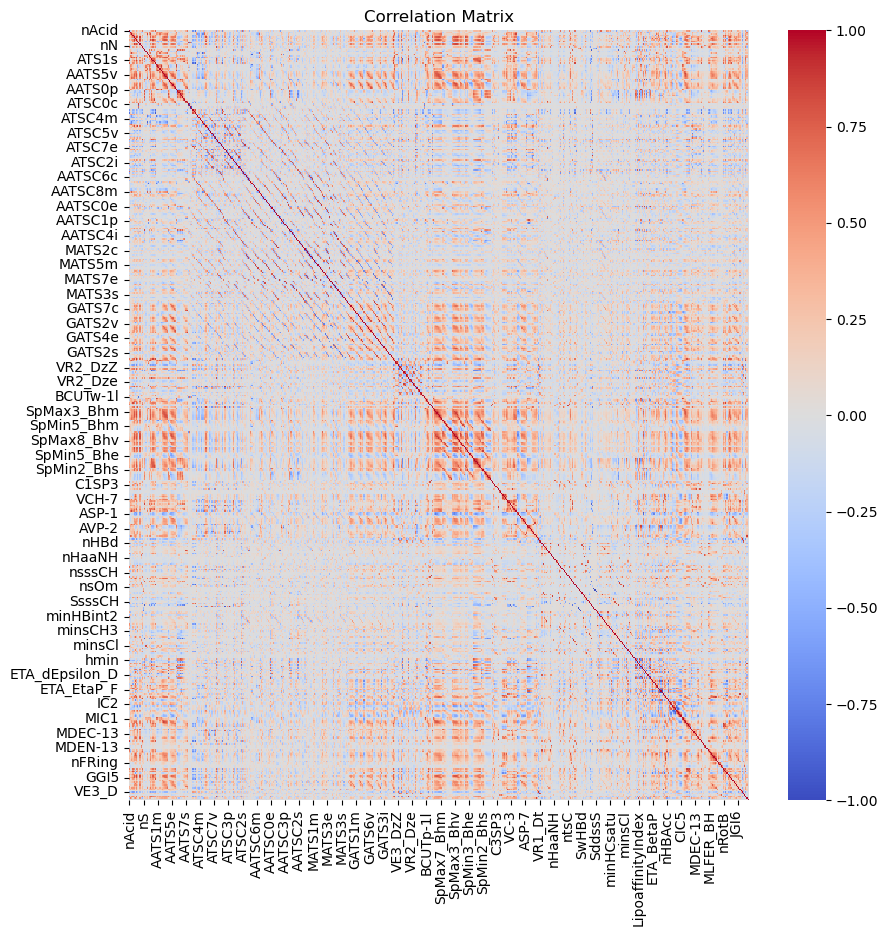

In [47]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Normalize the remaining variabes using a z-score

In [50]:
from scipy.stats import zscore

# a function to normalize all the data in a data frame execpt the target variable
def z_normalizer(df, target, noralize_target = False):
    column_names = df.columns
    normalized_data = pd.DataFrame(zscore(df), columns=column_names)
    if not noralize_target:
        normalized_data[target] = df[target]

    return normalized_data

normalized_df = z_normalizer(df_filtered2, 'GWP', noralize_target=True)
normalized_df['GWP'].min(), normalized_df['GWP'].max()

(-0.4598694602918442, 8.328619507091636)

In [ ]:
# normalized_df.to_csv('data/filtered_normalized.csv', index=False)